In [1]:
# -*- coding: utf-8 -*-
"""
@author: Pierre Guiot
Adaptation en notebook: Raphaël Wicker, Cateline Lantz
"""

'\n@author: Pierre Guiot\nAdaptation en notebook: Raphaël Wicker, Cateline Lantz\n'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import glob
from astropy.io import fits # Pour ouvrir et manipuler les données
from scipy.ndimage import rotate # Pour la rotation des images
from scipy.optimize import curve_fit # Pour la régression linéaire

# Lecture des données

Les prochaines lignes permettent d'accéder aux images de science, de Dark, de calib et potentiellement de Flats, pour les lire et récupérer les données sous forme d'array numpy.

Les chemins doivent prendre la forme `chemin/vers/les/fichiers/*`, l'astérique servant à signifier que vous récupérez tous les fichiers à l'intérieur du dossier qui vous intéresse.

Dans la cellule ci-dessous, vous pourrez trouver trois boucles `for` (une pour chaque type de donnée, quatre si vous utilisez le flat), ainsi que des tableaux `XXX_cube`:

* Les boucles `for` parcourent tous les fichiers présents dans le chemin fourni, en les triant dans l'ordre alphanumérique, et en fournissant une variable "compteur" et une variable "nom de fichier" à la boucle `for`.
* Les tableaux `XXX_cube` contiennent 3 dimensions selon lesquelles sont stockées les données : (n,l,c) où n est le numéro de l'image dans la série d'acquisitions, l la dimension des lignes de l'image et c la dimension des colonnes de l'image.

### Code

In [3]:
science_path = "Downloads/Documents/ASTRO/Jupiter_2400_21092022/sci/*" # Chemin vers les données de science
dark_path = "Downloads/Documents/ASTRO/Jupiter_2400_21092022/dark/*" # Chemin vers les dark
calib_path = "Downloads/Documents/ASTRO/Jupiter_2400_21092022/calib/*" # Chemin vers les calibs
# Si utilisation des flats, rajouter le chemin

science_cube = [5]
dark_cube = [9]
calib_cube = [12]

for i, file in enumerate(sorted(glob.glob(science_path))): 
    hdu = fits.open(file)
    image = hdu[0].data
    science_cube.append(image)

science_cube = np.asarray(science_cube, dtype=np.float64)

for i, file in enumerate(sorted(glob.glob(dark_path))):
    hdu = fits.open(file)
    image = hdu[0].data
    dark_cube.append(image)

dark_cube = np.asarray(dark_cube, dtype=np.float64)

for i, file in enumerate(sorted(glob.glob(calib_path))):
    hdu = fits.open(file)
    image = hdu[0].data
    calib_cube.append(image)

calib_cube = np.asarray(calib_cube, dtype=np.float64)
# Si utilisation des flats, créer un flat_cube sur le modèle des blocs de code précédents

### Visualisation

Afin d'améliorer la visualisation des contrastes des images, vous pourrez spécifier des mots-clef `vmin` et `vmax` à l'intérieur des `plt.imshow()`.
Sans spécifier ces seuils vous risquez de vous retrouver avec des images entièrement blanches, noires, ou saturées.

TypeError: Invalid shape () for image data

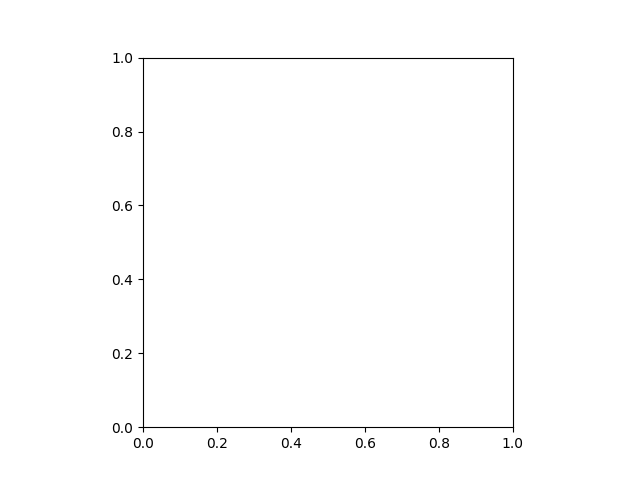

In [4]:
%matplotlib ipympl

plt.figure(1)
plt.clf()
plt.imshow(science_cube[0], interpolation=None, origin='lower', cmap='Greys_r') #vmin = , vmax = 
plt.title('First science image')
plt.colorbar()

plt.figure(2)
plt.clf()
plt.imshow(dark_cube[0], interpolation=None, origin='lower', cmap='Greys_r')
plt.title('First Dark image')
plt.colorbar()

plt.figure(3)
plt.clf()
plt.imshow(np.mean(dark_cube, axis=0), interpolation=None, origin='lower', cmap='Greys_r')
plt.title('Stacked master dark image')
plt.colorbar()

plt.figure(4)
plt.clf()
plt.imshow(calib_cube[0], interpolation=None, origin='lower', cmap='Greys_r')
plt.title('First Calib image')
plt.colorbar()

plt.figure(5)
plt.clf()
plt.imshow(np.mean(calib_cube, axis=0), interpolation=None, origin='lower', cmap='Greys_r')
plt.title('Stacked Calib image')
plt.colorbar()

# Si utilisation des flats, les visualiser sur le modèle des blocs de code précédents

# Réduction des données

Dans cette section, le but est de réduire les données brutes de science, pour parvenir à des données exploitables scientifiquement. Une image réduite $I_r$ est la soustraction de l'image brute $I_b$ et de la moyenne des darks, ou Master Dark, MD : $I_t = I_b - MD$. En cas d'utilisation des Flats, il faut également diviser le tout par la moyenne des Flats, le Master Flat MF : $I_r = \frac{I_b - MD}{MF}$.

### Code

In [19]:
for i in range(science_cube.shape[0]):
    science_cube[i,:,:] = science_cube[i,:,:] - np.mean(dark_cube, axis=0) #Ajouter le master flat si nécessaire

### Visualisation

In [ ]:
%matplotlib ipympl

plt.figure(6)
plt.clf()
plt.imshow(science_cube[0,:,:], interpolation=None, origin='lower', cmap='Greys_r') #vmin = , vmax = 
# Essayer de modifier le premier indice du cube pour tester.
plt.title('First science image with master dark subtracted')
plt.colorbar()

# Rotation des spectres

Le plus souvent, les spectres que vous obtiendrez en sortie de la réduction seront inclinés. Etant donné que votre but sera d'analyser des spectres, cela sera plus simple s'il suffit de récupérer une ligne dans un tableau numpy pour faire ce travail. Il faudra donc faire tourner l'image selon un angle que vous aurez déterminé pour que le spectre soit horizontal.

Pour pouvoir étalonner facilement les spectres, il faut faire cette démarche avec l'image de calibration également.

L'angle optimal de rotation peut être déterminé à l'aide de DS9. Attention l'angle optimal pour la rotation par python est l'opposé de l'angle donné par DS9 $\theta_{opt, python} = - \theta_{opt, DS9}$

### Code

In [21]:
### Données de science ###

rotated_cube = [] 
rotation_angle = # Angle en degrés à déterminer à l'aide de DS9 pour mettre le spectre horizontal.
for i in range(science_cube.shape[0]):
    rotated_cube.append(rotate(science_cube[i,:,:], rotation_angle))
rotated_cube = np.asarray(rotated_cube)

### Spectre de référence pour l'étalonnage spectral
Extraction du spectre de référence de la lampe à l'Argon-Néon : trouver l'indice de la ligne centrale du spectre selon laquelle on va effectuer une coupe pour extraire le spectre 1D

In [ ]:
### Images de calibration ###
image = calib_cube[0,:,:]

In [ ]:
%matplotlib ipympl

plt.figure(8)
plt.clf()
plt.imshow(rotate(image,rotation_angle), interpolation=None, origin='lower', cmap='Greys_r') #vmin = ,  vmax =
plt.title('First calib image rotated')
plt.colorbar()

In [ ]:
pixel_cut = # rentrer l'indice de la ligne centrale du spectre
ar_ne_spectrum = rotate(image,rotation_angle)[pixel_cut,:]

### Visualisation

In [ ]:
%matplotlib ipympl

### Données de science ###

plt.figure(7)
plt.clf()
plt.imshow(rotated_cube[0,:,:], interpolation=None, origin='lower', cmap='Greys_r') #vmin = ,  vmax =
plt.title('First science image rotated')
plt.colorbar()

### Images de calibration ###

plt.figure(9)
plt.clf()
plt.plot(ar_ne_spectrum)
plt.xlabel('Array index')
plt.ylabel('Arbitrary intensity')
plt.title('Ar Ne calibration lamp spectrum')
plt.grid()

# Etalonnage spectral à l'aide la lampe ArNe

Dans cette section, le but sera d'étalonner votre spectre, en reliant les positions des pics en pixels aux longueurs d'onde correspondantes.

### Définition de la zone du spectre
Ici le but est de trouver dans quelle zone de l'image se trouve le signal significatif du spectre : en effectuant une coupe verticale (dimension spatiale de l'image, perpendiculaire au spectre) dans l'image, on repère la zone d'intérêt et les zones qui ne sont que du bruit. Un critère quantitatif permettant de déterminer ces limites pourrait être l'écart-type.

Notez bien que selon le sujet que vous traitez, vous pouvez avoir besoin de l'information contenue le long de la direction spatiale. Dans ce cas, il ne faut pas utiliser de spectres moyennés verticalement sur plusieurs pixels, mais à des spectres extraits sur une seule ligne.

#### Coupe verticale

In [ ]:
%matplotlib ipympl

plt.figure(10)
plt.clf()
plt.plot(rotated_cube[0,:,2210]) # Indice de la colonne où la coupe est effectuée. À modifier
plt.ylim(0,1000) # À modifier
plt.ylabel('Arbitrary intensity')
plt.xlabel('Array index in px')
plt.grid()
plt.title('Spatial cut in Atik One images')

#### Extraction du spectre 1D

In [ ]:
%matplotlib ipympl

average_pixels= # Pixel central autour duquel les 20 pixels voisins sont moyennés pour "lisser" le spectre extrait.

#======================================================================================================
# À ne faire que si la dimension spatiale de vos données n'a pas d'importance ! Sinon, ne pas moyenner.
extract_avg_spectrum = np.mean(rotated_cube[0,average_pixels:average_pixels+20,:], axis=0)
#======================================================================================================

central_pix= # Pixel central où le spectre 1D est extrait (sans moyenne). À modifier
plt.figure(11)
plt.clf()
plt.plot(extract_avg_spectrum, 'k-', lw=1, label='spatially averaged')
plt.plot(rotated_cube[0,central_pix,:], 'r-', label='central cut')
plt.ylabel('Arbitrary intensity')
plt.xlabel('Arrays index, not wavelengths yet')
plt.title(' ') # À modifier
plt.grid()
plt.ylim()
plt.legend(loc='best')

### Correspondance pixels/longueurs d'onde
Utiliser le spectre de référence de l'ArNe présenté dans le polycopié pour repérer les raies et faire la correspondance entre leur longueur d'onde lue sur ce spectre et les indices en pixels lus sur vos graphiques précédents.

In [ ]:
%matplotlib ipympl

plt.figure(12)
plt.clf()
plt.plot(ar_ne_spectrum)
plt.xlabel('Array index')
plt.ylabel('Arbitrary intensity')
plt.title('Ar Ne calibration lamp spectrum')
plt.grid()

In [26]:
pixels_peaks = np.array([ ]) # A remplir
peaks_lambda = np.array([ ]) # A remplir
def affine(x, a=1, b=1):
    return a*x + b

calib_wvl = curve_fit(affine, pixels_peaks, peaks_lambda, p0=[2, 50])

calib_wavelengths = affine(range(len(extract_avg_spectrum)), a=calib_wvl[0][0], b=calib_wvl[0][1])

### Visualisation des spectres étalonnés

In [ ]:
%matplotlib ipympl

plt.figure(13)
plt.clf()
plt.plot(calib_wavelengths, extract_avg_spectrum, 'k-', lw=1, label='spatially averaged')
plt.plot(calib_wavelengths, rotated_cube[0,central_pix,:], 'r-', label='central cut')
plt.ylabel('Arbitrary intensity')
plt.xlabel('Wavelengths in nm')
plt.title('Reduced and calibrated spectra')
plt.grid()
plt.legend(loc='best')
plt.ylim(0, 2000) # A modifier


print("Traitement terminé, place à l'analyse !")